## I. Simulation de chaines de Markov

In [ ]:
def markovstep(P, x):
  

In [ ]:
def random(L):
    rand = np.random.rand()
    new_proba = 0
    for i in range(len(L)):
        new_proba += L[i]
        if rand < new_proba:
            return i
    return len(L) - 1

def markov_step(P, x):
    if type(x) == int:
        return [random(P[x])]
    
    return [random(P[i]) for i in x]

In [ ]:
import numpy as np


In [ ]:
P = 0.5*np.array( [ [1,1,0,0], [0,1,1,0], [0,0,1,1], [1,0,0,1]])
print(P)

[[0.5 0.5 0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.5 0.5]
 [0.5 0.  0.  0.5]]


In [ ]:
x=[0,3]

In [ ]:
proba  = P[x,:]
print(proba)

[[0.5 0.5 0.  0. ]
 [0.5 0.  0.  0.5]]


In [ ]:
proba  = P[x,:]
cumulative = np.cumsum(proba, axis=1)
print(cumulative)
uniform    = np.random.rand( len(x), 1 )*np.ones( (1, P.shape[0]), dtype=float) ## copie
y = [ np.min( np.where(where) ) for where in (cumulative>uniform)]

[[0.5 1.  1.  1. ]
 [0.5 0.5 0.5 1. ]]


In [ ]:
import numpy as np

def markov_step(P, x):
    """
    P: Transition matrix
    x: List of entries
    """
    proba      = P[x,:]
    cumulative = np.cumsum(proba, axis=1)
    uniform    = np.random.rand( len(x), 1 )*np.ones( (1, P.shape[0]), dtype=float)
    y = [ np.min( np.where(where) ) for where in (cumulative>uniform)]
    return y

def markov_steps(n, P, x):
    """
    n! nb  de realisation 
    P: Transition matrix
    x: List of entries
    """
    if n<= 0:
        return [ x ]
    else:
        y = markov_step(P,x)
        return [x] + markov_steps(n-1, P, y)

In [ ]:
P = 0.5*np.array( [ [1,1,0,0], [0,1,1,0], [0,0,1,1], [1,0,0,1]])
print(P)
## tests
for i in range(0,10):
    print( markov_step(P, [2]) )

[[0.5 0.5 0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.5 0.5]
 [0.5 0.  0.  0.5]]
[3]
[2]
[2]
[3]
[3]
[3]
[3]
[3]
[3]
[2]


[[0, 2], [1, 3], [2, 0], [2, 0], [3, 1], [3, 1], [3, 1], [0, 2], [0, 2], [1, 2], [2, 2]]


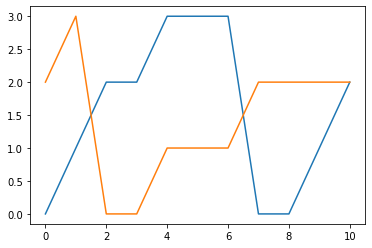

In [ ]:
import matplotlib.pyplot as plt
trajectory = markov_steps(10, P, [0,2])
print(trajectory)
plt.plot( trajectory, '-' )

[[0, 2], [0, 2], [1, 3], [2, 3], [2, 0], [2, 0], [3, 1], [3, 2], [0, 2], [1, 3], [1, 0]]


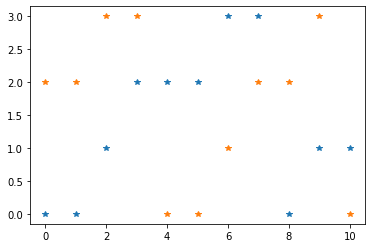

In [ ]:
import matplotlib.pyplot as plt

trajectory = markov_steps(10, P, [0,2])
print(trajectory)
plt.plot( trajectory, '*' )

## II. Mesure invariante

Pour une chaine de Markov sur un petit ensemble d'états, la méthode la plus simple qui demeure efficace est la méthode de la puissance

In [ ]:
np.linalg.matrix_power(P,100)

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
test=markov_steps(100,P,[0]*10000)
test2=test[100]
#test2=[i[-1] for i in test ]
print(test2.count(0)/10000,test2.count(1)/10000,test2.count(2)/10000,test2.count(3)/10000)

## III. Baby page rank

2


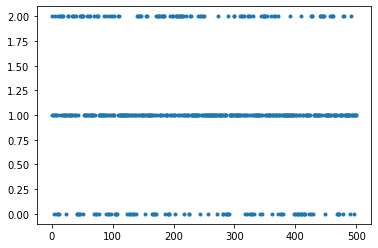

In [ ]:
Q = np.array( [ [1/3,1/3,1/3], [1/7,5/7,1/7], [1/12,7/12,4/12]] )

import matplotlib.pyplot as plt
## O - Site A
## 1 - site B
## 2 site c 
result= np.random.choice([0,1,2])
print(result)
trajectory = markov_steps(500, Q, [result])
plt.plot( trajectory, '.' )


In [ ]:
test=markov_steps(100,Q,[0]*10000)
test2=test[100]
#test2=[i[-1] for i in test ]
print(test2.count(0)/10000,test2.count(1)/10000,test2.count(2)/10000)

0.1567 0.6281 0.2152


In [ ]:
np.linalg.matrix_power(Q, 100)

array([[0.16071429, 0.625     , 0.21428571],
       [0.16071429, 0.625     , 0.21428571],
       [0.16071429, 0.625     , 0.21428571]])

## IV. Version plus réaliste

In [ ]:
import numpy as np

def sample_adjacency(degree, n):
    result = np.zeros( (n,n) )
    for i in range(degree):
        permutation = np.random.permutation(n)
        permutation_matrix = np.zeros( (n,n) )
        for j in range(n):
            permutation_matrix[j,permutation[j]] = 1
        result      = result + permutation_matrix
    return result

def normalize_matrix(matrix):sample_transitions
    result = matrix
    for i in range(0, matrix.shape[0]):
        result[i,:] = result[i,:]/np.sum(result[i,:])
    return result

def sample_transitions(degree, n):
    return normalize_matrix( sample_adjacency(degree, n) )

In [ ]:
# Test
print("Exemple de normalisation des lignes:")
print( normalize_matrix(np.ones( (3,3), dtype=float)) )
print("Echantillon de matrice de transition:")
print( sample_transitions(10,10) )

Exemple de normalisation des lignes:
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
Echantillon de matrice de transition:
[[0.  0.1 0.1 0.2 0.1 0.  0.  0.1 0.3 0.1]
 [0.2 0.  0.  0.4 0.1 0.1 0.  0.  0.2 0. ]
 [0.2 0.  0.1 0.1 0.2 0.  0.2 0.  0.1 0.1]
 [0.2 0.1 0.  0.  0.  0.1 0.2 0.1 0.2 0.1]
 [0.1 0.2 0.  0.  0.2 0.2 0.  0.1 0.  0.2]
 [0.1 0.1 0.2 0.  0.1 0.1 0.  0.2 0.  0.2]
 [0.  0.1 0.2 0.1 0.  0.2 0.1 0.2 0.1 0. ]
 [0.  0.1 0.1 0.1 0.1 0.2 0.2 0.  0.  0.2]
 [0.  0.1 0.1 0.1 0.  0.1 0.2 0.3 0.  0.1]
 [0.2 0.2 0.2 0.  0.2 0.  0.1 0.  0.1 0. ]]


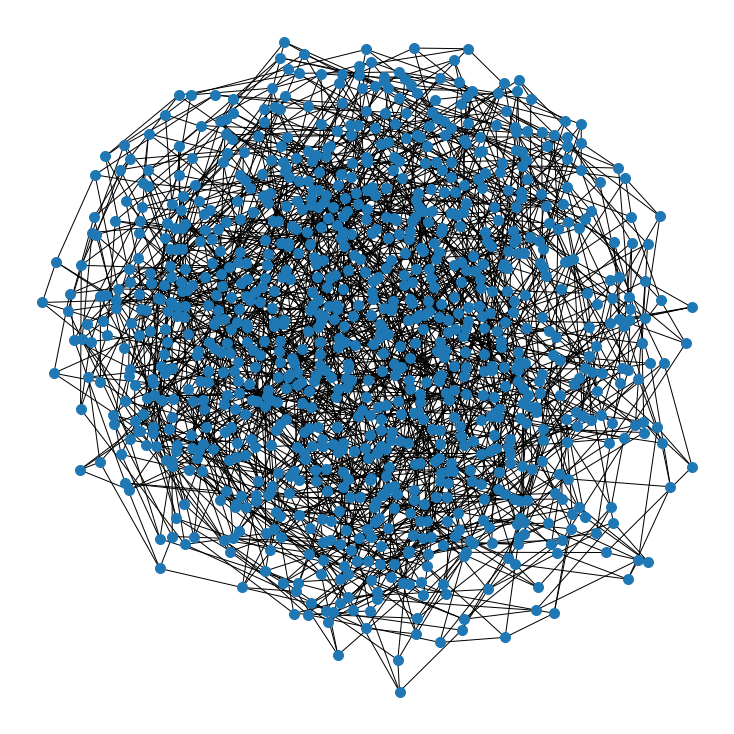

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=100)
    plt.show()

plt.rcParams['figure.figsize'] = 10, 10
show_graph( sample_transitions(2,1000) )